# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> ECE 046211 - Technion - Deep Learning
---

## HW2 - Multilayer NNs and Convolutional NNs
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
| Lavie Lederman | laviel@campus.technion.ac.il       | 319046504 |
| Barry Shafran  | barryshafran@campus.technion.ac.il | 206492910 |


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**.
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ece046211_hw2_id1_id2.ipynb`.
    * If you answered the questions in a different file you should submit a `.zip` file with the name `ece046211_hw2_id1_id2.zip` with content:
        * `ece046211_hw2_id1_id2.ipynb` - the code tasks.
        * `ece046211_hw2_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw2` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Generalization in A Teacher-Student Setup](#-Question-1--Generalization-in-A-Teacher-Student-Setup)
    * [Q2 - "Typical" Generalization in Multilayer Neural Networks](#-Question-2---"Typical"-Generalization-in-Multilayer-Neural-Networks)
    * [Q3 - Deep Double Descent](#-Question-3---Deep-Double-Descent)
    * [Q4 - Initialization](#-Question-4---Initialization)
    * [Q5 - Equivariance](#-Question-5---Equivariance)
    * [Q6 - VGG Architecture](#-Question-6--VGG-Architecture)
* [Part 2 - Code Assignments](#-Part-2---Code-Assignments)
    * [Task 1 - The Importance of Activation and Initialization](#-Task-1---The-Importance-of-Activation-and-Initialization)
    * [Task 2 - MLP-based Deep Classifer](#-Task-2---MLP-based-Deep-Classifer)
    * [Task 3 - Design a CNN](#-Task-3---Design-a-CNN)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 -Generalization in A Teacher-Student Setup
---

Recall from lecture 4 the Bayes Risk $\mathcal{\overline{R}}(w)$: $$ \mathcal{\overline{R}}(w) \triangleq \mathbb{E}_{\epsilon \sim \mathcal{N}(0, \sigma_{\epsilon}^2I), w_{true} \sim \mathcal{N}(0,\frac{\sigma_w^2}{d}I) } \left[\mathcal{R}\right], $$ where, $$ \mathcal{R}(w_{\mu}) = ||w_{\mu}-w_{true}||^2 = ||(H_{\mu}^{-1}H-I)w_{true} + H_{\mu}^{-1}X^T\epsilon||^2 $$

Prove:

$$ \overline{\mathcal{R}}(w_{\mu}) = \sum_{i=1}^d \frac{(\sigma_w^2/d) \mu^2 + \sigma_{\epsilon}^2 \lambda_i}{(\lambda_i + \mu)^2} $$

Hints:
* $\mathbb{E} \left[\epsilon^TXH_{\mu}^{-1}H_{\mu}^{-1}X^T\epsilon \right] = \sum_{i,j}^N\mathbb{E}[\epsilon_i \epsilon_j] \left(XH_{\mu}^{-1} \right)_i\left(H_{\mu}^{-1}X^T \right)_j$

* $\mathbb{E}[\epsilon_i \epsilon_j] = \sigma_{\epsilon}^2 \delta_{ij}$

* $\sum_{i=1}^N \left(XH_{\mu}^{-1} \right)_i\left(H_{\mu}^{-1}X^T \right)_i = Tr\left[XH_{\mu}^{-2}X^T \right] $

---
Answer Q1:

Let us define:

- $A = (H_\mu^{-1}H - I)w_{\text{true}}$
- $B = H_\mu^{-1}X^T\epsilon$

Then,
$$
\overline{\mathcal{R}}(w_\mu) = \mathbb{E}\left[ \|A + B\|^2 \right] = \mathbb{E}[\|A\|^2] + \mathbb{E}[\|B\|^2] + 2\mathbb{E}[\langle A, B \rangle]
$$

Since $w_{\text{true}}$ and $\epsilon$ are uncorrelated, the cross term vanishes:
$$
\mathbb{E}[\langle A, B \rangle] = 0
$$




We know $w_{\text{true}} \sim \mathcal{N}(0, \frac{\sigma_w^2}{d} I)$, so:

$$
\mathbb{E}[\|A\|^2] = \mathbb{E}\left[ \left\| (H_\mu^{-1}H - I) w_{\text{true}} \right\|^2 \right] = \frac{\sigma_w^2}{d} \cdot \mathrm{Tr}\left[ (H_\mu^{-1}H - I)^2 \right]
$$




Well use the hint:

$$
\mathbb{E}[\|B\|^2] = \mathbb{E}\left[ \epsilon^T X H_\mu^{-2} X^T \epsilon \right] = \sigma_\epsilon^2 \cdot \mathrm{Tr}(X H_\mu^{-2} X^T)
$$




Let $H = V \Lambda V^T$ where $\Lambda = \mathrm{diag}(\lambda_1, \dots, \lambda_d)$ and $V$ is orthogonal. Then:

$$
H_\mu = H + \mu I = V (\Lambda + \mu I) V^T
$$

Thus:

- $H_\mu^{-1} = V (\Lambda + \mu I)^{-1} V^T$
- $H_\mu^{-1} H = V (\Lambda + \mu I)^{-1} \Lambda V^T$
- $H_\mu^{-1}H - I = V \left( \frac{\Lambda}{\Lambda + \mu} - I \right) V^T = V \left( \frac{-\mu}{\Lambda + \mu} \right) V^T$



$$
(H_\mu^{-1}H - I)^2 = V \left( \frac{\mu^2}{(\Lambda + \mu)^2} \right) V^T \quad \Rightarrow \quad \mathrm{Tr}[(H_\mu^{-1}H - I)^2] = \sum_{i=1}^d \frac{\mu^2}{(\lambda_i + \mu)^2}
$$


$$
\mathrm{Tr}[X H_\mu^{-2} X^T] = \mathrm{Tr}[H H_\mu^{-2}] = \sum_{i=1}^d \frac{\lambda_i}{(\lambda_i + \mu)^2}
$$


Adding it all together we get:

$$
\overline{\mathcal{R}}(w_\mu) = \frac{\sigma_w^2}{d} \sum_{i=1}^d \frac{\mu^2}{(\lambda_i + \mu)^2} + \sigma_\epsilon^2 \sum_{i=1}^d \frac{\lambda_i}{(\lambda_i + \mu)^2}
= \sum_{i=1}^d \frac{(\sigma_w^2/d)\mu^2 + \sigma_\epsilon^2 \lambda_i}{(\lambda_i + \mu)^2}
$$

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - "Typical" Generalization in Multilayer Neural Networks
---


We examine a "student" neural network  $f_{\mathbf{w}}\left(\mathbf{x}\right)$ with parameter vector $\mathbf{w}\in\mathbb{R}^{k}$ and input $\mathbf{x}\in\mathbb{R}^{d_{0}}$  used in a binary classification problem where the training set is $\mathcal{S}=\left\{ \mathbf{x}^{\left(n\right)}\right\} _{n=1}^{N}$ sampled i.i.d. from $P_{X}$, where the binary $\left(\pm1\right)$ labels are generated by a "teacher" neural network $f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)$ with the same architecture. To understand the "typical" generalization of the student, we examine the following "Guess and Check" algorithm to learn its weights: we randomly sample parameters vectors $\mathbf{w}_{1},\mathbf{w}_{2},...$ i.i.d.from $P_{W}$, in which each parameter is sampled independently from a uniform distribution over $Q=\left\{ -\left(q-1\right)/2,\dots,-1,0,1,\dots,\left(q-1\right)/2\right\} $ quantization levels, where $q=\left|Q\right|$ is an odd positive number (assume that teacher weights are also in $Q$). We do this until a stopping time $t$ in which we perfectly fit the dataset: $\forall n:f_{\mathbf{w}_{t}}\left(\mathbf{x}^{\left(n\right)}\right)=f_{\mathbf{w}_{\star}}\left(\mathbf{x}^{\left(n\right)}\right)$. We examine a two-layer neural network with $d_{1}$ hidden neurons
$$
f_{\mathbf{w}}\left(\mathbf{x}\right)=\mathrm{sign}\left(\mathbf{w}_{2}^{\top}\left[\mathbf{W}_{1}\mathbf{x}\right]_{+}\right)
$$
where $\left[\cdot\right]_{+}$ is the ReLU activation function, the teacher has at most $d_{1}^{\star}<d_{1}$ non-zero neurons (i.e., the other $d_{1}-d_{1}^{\star}$ hidden neurons in the teacher to have all the incoming and outgoing weights equal to zero). Each of the teacher's weights are also in $Q$.

1. Calculate the probability $P_{\mathbf{w}\sim P_{W}}\left(\mathbf{w}=\mathbf{w}_{\star}\right).$
2. Prove that
\begin{equation}
(1) \:\:p_{\star}\triangleq P_{\mathbf{w}\sim P_{W}}\left(\forall\mathbf{x}:f_{\mathbf{w}}\left(\mathbf{x}\right)=f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)\geq q^{-d_{0}d_{1}^{*}-d_{1}}\,.
\end{equation}
3. Show that for any constant $T>0$, we can bound the probability of stopping time $t>T$ as
\begin{equation} (2) \:\:
\left\lfloor T\right\rfloor \leq\frac{\log P\left(t>T\right)}{\log\left(1-p_{\star}\right)}\,.
\end{equation}
4. Prove the generalization bound:
<br>
   **Theorem 1** *With probability* $\left(1-\eta\right)\left(1-\delta\right)$,
\begin{equation}(3) \:\:
\epsilon<\frac{\left(d_{0}d_{1}^{\star}+d_{1}\right)\log q+\log\frac{1}{\delta}+\log\log\frac{1}{\eta}}{N}
\end{equation}
**Hint**: Combine the results from previous sections, using the approximations $\left\lfloor T\right\rfloor \approx T$ and $\log\left(1-p_{\star}\right)\approx-p_{\star}$ (treat these approximations as exact), and the following basic generalization
 bound (which we learned in class):
<br>
     **Theorem 2** *For any* $f\in\left|\mathcal{F}\right|$ $f\in\left|\mathcal{F}\right|$, *with probability* $1-\delta$,
\begin{equation} (4) \:\:
\epsilon\triangleq\mathbb{P}_{\mathbf{x}}\left(f_{\mathbf{w}}\left(\mathbf{x}\right)\neq f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)<\frac{\log\left|\mathcal{F}\right|+\log\frac{1}{\delta}}{N}\,.
\end{equation}
6. Is the bound in eq. $(3)$ better than the bound in eq. $(4)$ in which $\mathcal{F}=\left\{ f_{\mathbf{w}}:\mathbf{w}\in Q^{k}\right\} $  is the student hypothesis class (in which each parameter can have one of $q$ values)? Explain and ignore the (negligble) $\log\log\frac{1}{\eta}$ term.

---
Answer Q2

1.
   Each parameter in $\mathbf{w}$ is sampled i.i.d from the set $Q$, which contains $q$ distinct values. The full parameter vector $\mathbf{w}$ is in $\mathbb{R}^k$, so there are $k$ such parameters.

Since each parameter has a $1/q$ chance of matching the corresponding parameter in $\mathbf{w}_\star$, the total probability that all $k$ matching parameters is:

$$
P_{\mathbf{w} \sim P_W}(\mathbf{w} = \mathbf{w}_\star) = \left( \frac{1}{q} \right)^k = q^{-k}
$$

---

2.
   We are asked to show that the probability that a randomly sampled weight vector matches the teacher's function for all inputs that satisfy it.


Well build a student network that behaves identically to the teacher:

- The teacher has only $d_1^\star$ active neurons.
- For these $d_1^\star$ neurons:
  - Set the student’s weights to match the teacher’s.
- For the remaining $d_1 - d_1^\star$ neurons:
  - Set all weights to 0.

Each active neuron uses $d_0$ input weights and 1 output weight, meaning $d_0 + 1$ parameters.

So the number of parameters for the $d_1^\star$ active neurons is:

$$
d_1^\star \cdot (d_0 + 1) = d_0 d_1^\star + d_1^\star
$$

The other $d_1 - d_1^\star$ neurons require setting only their output weights to zero. That’s:

$$
d_0 d_1^\star + d_1^\star + (d_1 - d_1^\star) = d_0 d_1^\star + d_1
$$

Each parameter must take on a specific value in $Q$, and the probability of that is $1/q$.  So similar to part 1:
$$
p_\star = q^{-(d_0 d_1^\star + d_1)}
$$
But that is only for the exact same vector and the teacher's, it is possible the different neurons or different weights would still
match the teacher's, thus we get that the probability could be greater than excactly $q^{-(d_0 d_1^\star + d_1)}$.
Thus:
$$
p_\star \geq q^{-(d_0 d_1^\star + d_1)}
$$

---

3.
$t$ is geometric with success probability $p_\star$, so:

$$
\mathbb{P}(t > T) = (1 - p_\star)^T
$$

Use log on both sides:

$$
\log \mathbb{P}(t > T) = T \log(1 - p_\star)
\Rightarrow T = \frac{\log \mathbb{P}(t > T)}{\log(1 - p_\star)}
$$

So:

$$
\lfloor T \rfloor \leq \frac{\log \mathbb{P}(t > T)}{\log(1 - p_\star)}
$$

---

4.

From theorem 2:

$$
\epsilon < \frac{\log |\mathcal{F}| + \log \frac{1}{\delta}}{N}
$$

Let $\mathcal{F}$ be the set of networks returned within $T$ trials.

From Q 3, with probability at least $1 - \eta$, we succeed within $T$ trials.

So:

$$
|\mathcal{F}| \leq T \Rightarrow \log |\mathcal{F}| \leq \log T
$$

From Q 2:

$$
p_\star \geq q^{-(d_0 d_1^\star + d_1)} \Rightarrow \log \frac{1}{p_\star} = (d_0 d_1^\star + d_1)\log q
$$

We choose:

$$
T = \frac{\log \frac{1}{\eta}}{p_\star} \Rightarrow \log T = \log \log \frac{1}{\eta} + \log \frac{1}{p_\star}
$$

So the bound becomes:

$$
\epsilon < \frac{(d_0 d_1^\star + d_1)\log q + \log \frac{1}{\delta} + \log \log \frac{1}{\eta}}{N}
$$

---

5.
We compare:

Bound (Q3):

$$
\epsilon < \frac{(d_0 d_1^\star + d_1)\log q + \log \frac{1}{\delta} + \log \log \frac{1}{\eta}}{N}
$$

Theorem 2 bound with full class $( \mathcal{F} = \{ f_{\mathbf{w}} : \mathbf{w} \in Q^k \})$:

$$
\epsilon < \frac{k \log q + \log \frac{1}{\delta}}{N}, \quad \text{where } k = d_0 d_1 + d_1
$$

Conclusion:

Bound 3 depends only on the effective number of parameters (those used by the teacher):  
$k_{\text{eff}} = d_0 d_1^\star + d_1$

If $d_1^\star \ll d_1$, then:

$$
(d_0 d_1^\star + d_1) \ll (d_0 d_1 + d_1)
$$

Thus bound 3 is better because it depends only on the number of effective non-zero neurons.


## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Deep Double Descent
---

For the following plots:
1. Where is the critical point (the point of transition between the "Classical Regime" and "Modern Regime") of the deep double descent?
2. What type of double descent is shown (**look closely at the graph**)? Explain. There can be more than one correct answer.
    

a. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_transformer.PNG' style="height:300px">

b. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_resnet.PNG' style="height:400px">

c. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_intermediate.PNG' style="height:300px">


---

Q3


 a. Transformer Model Size
 Critical point: Around embedding dimension 200 for De-En, and 300 for En-Fr.
 Type:  model size double descent.

 b. ResNet18 Width
 Critical point: Around width = 10–15.
 Type:
   Model size double descent +
   Double descent with label noise (0%, 10%, 20% noise ).

 c. Epochs for Different Widths
  Critical point: Around epoch = 100–300 for intermediate model.
  and around epoch = 70 for the large model.
  it seems like the small model did not reach a critical point in the given epochs.
  Type:  Epoch(training time) double descent.


## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 4 - Initialization
---
Recall that in lecture 5 we were discussing how to calculate the initialization variance, and reached the conclusion that $$ \sigma_l =\frac{1}{\sqrt{\sum_j \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]}} $$
Show that for ReLU activation ($\varphi(z) = max(0,z)$), the optimal variance satisfies: $$ \sigma_l = \sqrt{\frac{2}{d_{l-1}}}$$

1. Under the assumption that the distribution of $W$ is symmetric ($\to$ the distribution of $u$ is symmetric).
2. Using the central limit theorem for large width.

Answer each section **separately** and assume the sections are independent.

All the notations are the same as in the lecture slides.



---

Q4


 1. symmetric distribution assumption

If the distribution of $u_{l-1}[j]$ is symmetric (e.g., zero-mean), then:

$$
\mathbb{E}[\varphi^2(u)] = \frac{1}{2} \mathbb{E}[u^2] = \frac{1}{2}
$$

So:

$$
\sum_j \mathbb{E}[\varphi^2(u_{l-1}[j])] = d_{l-1} \cdot \frac{1}{2}
\Rightarrow \sigma_l = \frac{1}{\sqrt{d_{l-1} \cdot \frac{1}{2}}} = \sqrt{\frac{2}{d_{l-1}}}
$$

---

2. using central Limit teorem for large width

for large width, by CLT: $( u_{l-1}[j] \sim \mathcal{N}(0, 1))$

then using ReLU:

$$
\mathbb{E}[\max(0, u)^2] = \frac{1}{2} \quad \text{(half-normal squared mean)}
$$

So:

$$
\sigma_l = \frac{1}{\sqrt{d_{l-1} \cdot \frac{1}{2}}} = \sqrt{\frac{2}{d_{l-1}}}
$$


## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 5 - Equivariance
---

Recall from lecture 6:
A function $f: \mathbb{R}^d \to \mathbb{R}^d$ is equivariant if $f(\tau \cdot x) = \tau \cdot f(x)$ for all $\tau$.

Let $f_w(x) = \phi (Wx)$ where $\phi$ is a component-wise non-linearity and $W \in \mathbb{R}^{d\times d}$. Prove that $f_w:\mathbb{R}^d \to \mathbb{R}^d$ is equivariant to transformation family $H$ **if and only if**: $$ \forall \tau \in H, W[i, j] = W[\tau(i), \tau(j)] $$

* As in class, $\tau$ is an operator which re-arranges the terms in the vector it is operating on. $\tau(i)=j$ implies that component $i$ is mapped to component $j$. In addition, $\tau \cdot x$ means we use $\tau$ on $x$.
* Assume one-by-one activations (<a href="https://en.wikipedia.org/wiki/Injective_function">Injective functions/one-by-one</a>)

---

Q5



 -->

assume:

$$
f_w(\tau \cdot x) = \tau \cdot f_w(x)
$$

Let $P_\tau \in \mathbb{R}^{d \times d}$ be the permutation matrix corresponding to $\tau$, so $\tau \cdot x = P_\tau x$. Then:

$$
\phi(W P_\tau x) = P_\tau \phi(Wx) \quad \text{for all } x
$$

Since $\phi$ is component-wise and injective, we can apply $\phi^{-1}$ to both sides:

$$
W P_\tau x = P_\tau W x \quad \forall x \Rightarrow W P_\tau = P_\tau W
$$

This means $W$ commutes with every permutation matrix $P_\tau$. It is a known fact that:

$$
W P_\tau = P_\tau W \iff W[i,j] = W[\tau(i), \tau(j)]
$$

Hence:

$$
{W[i,j] = W[\tau(i), \tau(j)] \quad \forall \tau \in H}
$$

---

<--

assume:

$$
W[i,j] = W[\tau(i), \tau(j)] \quad \forall \tau \in H
$$

then:

$$
W = P_\tau W P_\tau^{-1} \Rightarrow W P_\tau = P_\tau W
$$

therefore:

$$
f_w(\tau \cdot x) = \phi(W P_\tau x) = \phi(P_\tau W x) = P_\tau \phi(W x) = \tau \cdot f_w(x)
$$

so:

$$
{f_w \text{ is equivariant to all } \tau \in H}
$$

---


We have shown both directions:

$$
f_w(\tau \cdot x) = \tau \cdot f_w(x) \iff \forall \tau \in H, \quad W[i,j] = W[\tau(i), \tau(j)]
$$

Thus, the function $f_w(x) = \phi(Wx)$ is equivariant to the transformation family $H$ **if and only if** the weight matrix $W$ satisfies the index-permutation condition.


## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 6 - VGG Architecture
---

1. The VGG-11 CNN architecture consists of 11 convolution (CONV)/fully-connected (FC) layers (every CONV layer has the same padding and stride, every MAXPOOL layer is 2×2 and has padding of 0 and stride 2). Fill in the table. You need to **consider the bias**.


* CONV$M$-$N$: a convolutional layer of size $M \times M \times N$, where $M$ is the kernel size and $N$ is the number of filters. $stride=1, padding=1$.
* POOL2: $2 \times 2$ Max Pooling with $stride=2$
    * In case the input of the layer is odd, you should round down. For example, if the output of the layer should be $3.5 \times 3.5 \times 3$, you should round to $3 \times 3 \times 3$ (i.e., ignore the last column of the input image when performing MaxPooling).
* FC-N: a fully connected layer with $N$ neurons.


| Layer  | Output Dimension  | Number of Parameters (Weights) |
|---|---|---|
| INPUT  |  224x224x3 | 0  |
|  CONV3-64 | 224x224x64  | 1792  |
| ReLU |  224x224x64 | 0  |
| POOL2|  112x112x64 | 0  |
|CONV3-128 | 112x112x128 | 73856|
|ReLU | 112x112x128 | 0|
| POOL2|  56x56x128 | 0  |
|CONV3-256 | 56x56x256 | 295168|
|ReLU | 56x56x256 | 0|
|CONV3-256 | 56x56x256 | 590080|
|ReLU | 56x56x256 | 0|
| POOL2|  28x28x256 | 0  |
|CONV3-512 | 28x28x512 | 1180160|
|ReLU | 28x28x512 | 0|
|CONV3-512 | 28x28x512 | 2359808|
|ReLU | 28x28x512 | 0|
| POOL2|  14x14x512 | 0  |
|CONV3-512 | 14x14x512 | 2359808|
|ReLU | 14x14x512 | 0|
|CONV3-512 | 14x14x512 | 2359808 |
|ReLU | 14x14x512 | 0|
| POOL2|  7x7x512 | 0  |
| FC-4096|  1x1x4096 | 102764544  |
| FC-4096|  1x1x4096 | 16781312  |
| FC-1000|  1x1x1000 | 4097000  |
| SOFTMAX|  1x1x1000 | 0  |

2. What is the total number of parameters? (use a calculator for this one)
3. What percentage of the weights are found in the fully-connected layers?

---

Total parameters: 132,863,336

precentage of parameters that are due to FC layers:

FC parameters = 123,642,856

thus the precentage is 93.06%.

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

#### Tips
---
1. Uniformly distributed tensors - `torch.Tensor(dim1, dim2, ...,dimN).uniform_(-1, 1)`
2. Separation to **validation set** in PyTorch - <a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">See example here</a>.

In [ ]:
# imports for the practice (you can add more if you need)
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# %matplotlib ipympl
%matplotlib inline

seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - The Importance of Activation and Initialization
---
In this task, we are going to use $x \in \mathcal{R}^{512}$ and simple neural network that outputs $f(x) \in \mathcal{R}^{512}$. The network will have 100 layers with 512 units in each layer.

1. We initialize the weights from a unit normal distribution. Run the following code cell and explain what happens. Add a short piece of code that locates when it happens (hint: use `torch.isnan()`). **Print** the layer number.
2. We can demonstrate that at a given layer, the matrix product of inputs $x$ and weight matrix $a$ that is initialized from a standard normal distribution will, on average, have a standard deviation very close to the square root of the number of input connections. For our example, with 512 dimensions, show that for 10,000 multiplications of $a$ and $x$, the empirical standard deviation is similar to the square root of the number of input connections. Use the unbiased version: $$ \hat{std} = \sqrt{\frac{\sum_{i=1}^{10000}\frac{1}{N}\sum_{j=1}^N y^2}{10000}}, $$ where $y=ax$ and $N$ is the number of input connections. **Print** the mean, std and the square root of the number of input connections.
3. For the code from 1, normalize the weight initialization by the square root of the input connections. How does that change the outcome? **Print** the mean and std after the modification.
4. Add a `tanh()` activation after each layer for the code from 1. **Print** the mean and std after the modification. Explain the result.
5. Xavier initialization sets a layer’s weights to values chosen from a random uniform distribution that’s bounded between $$\pm \sqrt{\frac{6}{n_i + n_{i+1}}}$$ where $n_i$ is the number of incoming network connections, or “fan-in,” to the layer, and $ n_{i+1}$ is the number of outgoing network connections from that layer, also known as the “fan-out”. Glorot and Bengio believed that Xavier weight initialization would maintain the variance of activations and back-propagated gradients all the way up or down the layers of a network and demonstrated that networks initialized with Xavier achieved substantially quicker convergence and higher accuracy. Implement **Xavier Uniform** as `xavier_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Xavier Uniform**. Use it on the simple network from 1 with `tanh` activation. **Print** the mean and std after the modification.
6. If you try to replace the `tanh` activation with `relu` activation in section 5, you will see very different results. Xavier strives to acheive activation outputs of each layer to have a mean of 0 and a standard deviation around 1, on average. When using a ReLU activation, a single layer will, on average have standard deviation that’s very close to the square root of the number of input connections, **divided by the square root of two** ($\sqrt{\frac{512}{2}}$ in our example). **Kaiming He et. al.** proposed an initialization scheme that’s tailored for deep neural nets that use these kinds of asymmetric, non-linear activations. Implement **Kaiming Normal** as `kaiming_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Kaiming Normal** (use `fan_in` mode). Use it on the simple network from 1 with `relu` activation. **Print** the mean and std after the modification. What happens when you use Xavier with RelU activation?

In [ ]:
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512)
    x = a @ x
print(x.mean(), x.std())

tensor(nan) tensor(nan)


In [ ]:
# 1
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512)
    x = a @ x
    if torch.isnan(x).any():
        print(f"NaN detected at layer {i}")
        break


NaN detected at layer 28


A NaN is detected at layer 28 probably due floating point overflow

In [ ]:
#2
N = 512
num_samples = 10000
squared_norms = []
mean = []
std = []
calc_std = 0

for _ in range(num_samples):
  x = torch.randn(N)
  a = torch.randn(N, N)
  y = a @ x
  mean.append(y.mean())
  std.append(y.std())
  calc_std += (torch.sum(y**2)/N)


print(f"Empirical std estimate     = {np.mean(std):.4f}")
print(f"Mean of squared norms      = {np.mean(mean):.4f}")
print(f"Square root of N           = {np.sqrt(N):.4f}")
print(f"Calc std is= {torch.sqrt(calc_std/10000):.4f}")

Empirical std estimate     = 22.6089
Mean of squared norms      = -0.0031
Square root of N           = 22.6274
Calc std is= 22.6309


In [ ]:
#3
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512) / np.sqrt(512)
    x = a @ x
print(f"Mean is {x.mean():.4f} std is {x.std():.4f}")


Mean is 0.0023 std is 1.0083


In [ ]:
#4
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512) / np.sqrt(512)
    x = torch.tanh(a @ x)
print(f"Mean is {x.mean():.4f} std is {x.std():.4f}")


Mean is -0.0006 std is 0.0607


In [ ]:
#5
def xavier_init(fan_in, fan_out):
    return torch.Tensor(fan_in, fan_out).uniform_(-np.sqrt(6/(fan_in + fan_out)), np.sqrt(6/(fan_in + fan_out)))

x = torch.randn(512)
for i in range(100):
    a = xavier_init(512,512)
    x = torch.tanh(a @ x)
print(f"Mean is {x.mean():.4f} std is {x.std():.4f}")


Mean is -0.0000 std is 0.0546


In [ ]:
#6a
def kaiming_init(fan_in, fan_out):
    return torch.Tensor(fan_in, fan_out).normal_(0, np.sqrt(2/fan_in))
x = torch.randn(512)
for i in range(100):
    a = kaiming_init(512,512)
    x = torch.relu(a @ x)
print(f"Kaiming with relu: Mean is {x.mean():.4f} std is {x.std():.4f}")


x = torch.randn(512)
for i in range(100):
    a = xavier_init(512,512)
    x = torch.relu(a @ x)
print(f"Xavier Mean is {x.mean()} std is {x.std()}, (very close to zero - not good!!!)")

Kaiming with relu: Mean is 0.2839 std is 0.4314
Xavier Mean is 3.35373272223802e-16 std is 5.24851419090596e-16, (very close to zero - not good!!!)


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - MLP-based Deep Classifer
---
In this task you are going to design and train your first neural network for classification.

For this task, we will use the "<a href="https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope">MAGIC Gamma Telescope Data Set"</a>. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera.

Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (**signal**) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (**background**).

Our data has 10 features and 2 classes (signal and background).

1. Load the MAGIC dataset sored in `magic04.data` and display the first 5 features (just run the cell).
2. Separate the data to train, validation and test, reserve 10% of the data for validation and 20% for test.
3. Perform pre-processing steps of your choice and convert the class label from `str` to `int` (for example, `y_train = np.array([0 if y_train[i] == 'g' else 1 for i in range(len(y_train))]).astype(np.int)`).
4. Train a Logistic Regression model from `sklearn` as a baseline for our neural network (only for this section use both the train and validation sets for training the classifier). **Print the test accuracy**.
5. Convert the `numpy` arrays to `torch` tensors with `TensorDataset` as done in the tutorial.
6. Design a **MLP** to classify the data. Optimize the hyper-parameters of your model using the accuracy on the validation set, and when you are satisfied with the model train it on both the train and validation sets and evaluate it on the test set. **You need to reach at least 85% accuracy on the test set, and 87% for a full grade**.
    * You have a free choice of architecture, optimizer, learning scheduler, initialization, regularization and activations.
    * The loss criterion is binary cross entropy: `nn.BCEWithLogitsLoss()` (performs `sigmoid` for you) or `nn.BCELoss` (you need to apply `sigmoid` on the network output yourself).
    * In a Markdown block, write down the chosen architectures and all the hyper-parameters.
        * Make sure to describe any design choice that you used to improve the performance (e.g. if you used a certain regularization or layer, mention it and describe why you think it helped).
    * **Plot** the loss curves (and any oter statistic you want) as a function of epochs/iterations. **Print** the final performance.
    * **Print** the test accuracy.
7. Pick **2** initializations of your choosing and change the initialization of the linear layers and re-train the model (with the same optimal hyper-parameters you found). You can pick an initialization of your choosing from : https://pytorch.org/docs/stable/nn.init.html . See example below how to use. **Print** the change in accuracy for both changes (you should end up with 3 results - original, `init 1` and `init 2`).

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving magic04.data to magic04.data


In [ ]:
# loading the data
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
data = pd.read_csv("./magic04.data", names=col_names)
X = data[feature_names]
Y = data['class']
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
# separate to train, test
seed = 211
np.random.seed(seed)
torch.manual_seed(seed)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.125, random_state=seed)


In [ ]:
# pre-processing and converting labels to integers
y_train = np.array([0 if y == 'g' else 1 for y in y_train]).astype(int)
y_test = np.array([0 if y == 'g' else 1 for y in y_test]).astype(int)
y_val = np.array([0 if y == 'g' else 1 for y in y_val]).astype(int)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# MAGIC dataset has 10 features and 1 label
col_names = [f'f{i}' for i in range(10)] + ['label']
df = pd.read_csv("magic04.data", header=None, names=col_names)

# Now split features and labels properly
X = df.iloc[:, :-1].astype(float).values    # 10 float features
y = np.array([0 if lbl == 'g' else 1 for lbl in df['label']], dtype=int)
# Splits
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, stratify=y_temp, random_state=42)

# Train on train + val
X_trainval = np.concatenate((X_train, X_val))
y_trainval = np.concatenate((y_train, y_val))

# Logistic Regression
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_trainval, y_trainval)
y_pred_test = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", acc)



Test Accuracy: 0.7988958990536278


In [ ]:
# create TensorDataset from numpy arrays

# Convert to float32 for features and float32 for BCE loss labels
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# (Optional) Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
import copy

# Define model
class MyModel(nn.Module):
    def __init__(self, input_dim=10):
        super(MyModel, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(32, 1)
        )
        self.output_layer = nn.Sigmoid()

    def forward(self, x):
        return self.output_layer(self.hidden(x))

# Binary accuracy
def binary_accuracy(y_pred, y_true):
    y_pred_labels = (y_pred > 0.5).float()
    return (y_pred_labels == y_true).float().mean().item()

# Evaluation function
def evaluate_model(model, optimizer_class, weight_decay, train_loader, val_loader, epochs=10):
    model = model.to(device)
    criterion = nn.BCELoss()
    optimizer = optimizer_class(model.parameters(), lr=0.001, weight_decay=weight_decay)

    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device).float().view(-1, 1)
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    val_acc = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device).float().view(-1, 1)
            preds = model(xb)
            val_loss += criterion(preds, yb).item()
            val_acc += binary_accuracy(preds, yb)

    val_loss /= len(val_loader)
    val_acc /= len(val_loader)
    return val_loss, val_acc

# Grid search setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

optimizers = {
    "Adam": optim.Adam,
    "AdamW": optim.AdamW,
    "SGD": optim.SGD
}

weight_decays = [0, 1e-5, 1e-3]
results = []

for opt_name, opt_class in optimizers.items():
    for wd in weight_decays:
        model = MyModel()
        val_loss, val_acc = evaluate_model(copy.deepcopy(model), opt_class, wd, train_loader, val_loader, epochs=10)
        results.append((opt_name, wd, val_loss, val_acc))
        print(f"{opt_name:<6} | WD={wd:<6} | Val Loss={val_loss:.4f} | Val Acc={val_acc:.4f}")


Adam   | WD=0      | Val Loss=0.3966 | Val Acc=0.8120
Adam   | WD=1e-05  | Val Loss=0.4005 | Val Acc=0.8105
Adam   | WD=0.001  | Val Loss=0.3954 | Val Acc=0.8107
AdamW  | WD=0      | Val Loss=0.3980 | Val Acc=0.8126
AdamW  | WD=1e-05  | Val Loss=0.3949 | Val Acc=0.8131
AdamW  | WD=0.001  | Val Loss=0.3987 | Val Acc=0.8098
SGD    | WD=0      | Val Loss=0.6403 | Val Acc=0.6531
SGD    | WD=1e-05  | Val Loss=0.6504 | Val Acc=0.6572
SGD    | WD=0.001  | Val Loss=0.6476 | Val Acc=0.6682


In [ ]:
# Set best hyperparams
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
criterion = nn.BCELoss()
epochs = 200
train_losses = []
val_losses = []
model = model.to(device)

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device).float().view(-1, 1)

        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    # Evaluate on validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).float().view(-1, 1)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch+1}/{epochs} - Train loss: {train_losses[-1]:.4f} - Val loss: {val_losses[-1]:.4f}")


Epoch 1/200 - Train loss: 0.4903 - Val loss: 0.4435
Epoch 2/200 - Train loss: 0.4366 - Val loss: 0.4160
Epoch 3/200 - Train loss: 0.4275 - Val loss: 0.4164
Epoch 4/200 - Train loss: 0.4225 - Val loss: 0.4081
Epoch 5/200 - Train loss: 0.4123 - Val loss: 0.4020
Epoch 6/200 - Train loss: 0.4074 - Val loss: 0.4005
Epoch 7/200 - Train loss: 0.4041 - Val loss: 0.4011
Epoch 8/200 - Train loss: 0.4018 - Val loss: 0.3946
Epoch 9/200 - Train loss: 0.3985 - Val loss: 0.3924
Epoch 10/200 - Train loss: 0.3970 - Val loss: 0.3931
Epoch 11/200 - Train loss: 0.3919 - Val loss: 0.3893
Epoch 12/200 - Train loss: 0.3912 - Val loss: 0.3905
Epoch 13/200 - Train loss: 0.3888 - Val loss: 0.3893
Epoch 14/200 - Train loss: 0.3894 - Val loss: 0.3876
Epoch 15/200 - Train loss: 0.3861 - Val loss: 0.3875
Epoch 16/200 - Train loss: 0.3846 - Val loss: 0.3866
Epoch 17/200 - Train loss: 0.3855 - Val loss: 0.3822
Epoch 18/200 - Train loss: 0.3764 - Val loss: 0.3852
Epoch 19/200 - Train loss: 0.3773 - Val loss: 0.3826
Ep

✅ Final Test Accuracy: 0.8728


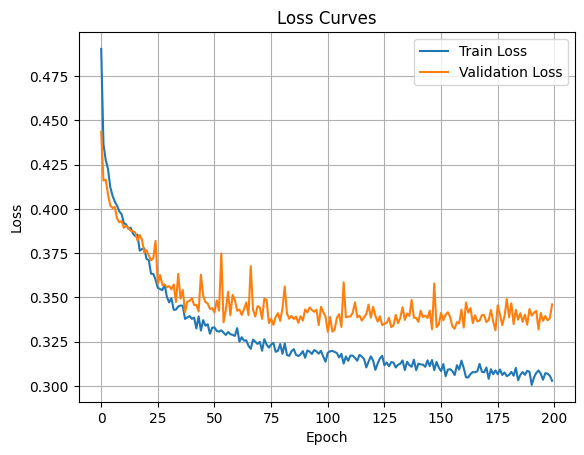

In [ ]:
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        yb = yb.to(device)

        output = model(xb).squeeze()
        pred = (output > 0.5).int()

        y_true.extend(yb.int().cpu().tolist())
        y_pred.extend(pred.cpu().tolist())

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print(f"✅ Final Test Accuracy: {accuracy:.4f}")

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curves")
plt.grid(True)
plt.show()


Our design choice was based on a more modern and robust architecture, as seen in our MyModel implementation.
We decided to incorporate standard components like Linear layers and ReLU activations as a foundation, but we also included additional techniques such as BatchNorm1d and Dropout to promote better convergence and reduce overfitting. We gradually decreased the dimensionality through the layers, which helps guide the model toward learning progressively abstract features without sudden compression that may cause information loss. Since this architecture quickly reached high validation accuracy and demonstrated stable training, we saw no need to explore more complex alternatives.

Linear	10->128
BatchNorm1d	128->	128
ReLU	128->	128
Dropout (0.3)	128->	128
Linear	128->	64
ReLU	64->	64
Dropout (0.2)	64->	64
Linear	64->	32
ReLU	32->	32
Dropout (0.1)	32->	32
Linear	32->	1
Sigmoid	1->	1

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim

# Init function
def initialize_weights(model, init_fn):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            init_fn(m.weight)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)

# Evaluation
def train_and_evaluate(model, train_loader, val_loader, epochs=10):
    model = model.to(device)
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
    criterion = nn.BCELoss()

    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device).float().view(-1, 1)

            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

    # Validation accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device).float().view(-1, 1)
            y_pred = model(X_batch)
            preds = (y_pred > 0.5).float()
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)
    return correct / total

# Run all 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Default
model_default = MyModel()
acc_default = train_and_evaluate(model_default, train_loader, val_loader)
print(f"Default Init Accuracy:     {acc_default:.4f}")

# Kaiming Uniform
model_kaiming = MyModel()
initialize_weights(model_kaiming, init.kaiming_uniform_)
acc_kaiming = train_and_evaluate(model_kaiming, train_loader, val_loader)
print(f"Kaiming Uniform Accuracy:  {acc_kaiming:.4f} | Δ = {acc_kaiming - acc_default:+.4f}")

# Xavier Normal
model_xavier = MyModel()
initialize_weights(model_xavier, init.xavier_normal_)
acc_xavier = train_and_evaluate(model_xavier, train_loader, val_loader)
print(f"Xavier Normal Accuracy:    {acc_xavier:.4f} | Δ = {acc_xavier - acc_default:+.4f}")


Default Init Accuracy:     0.8101
Kaiming Uniform Accuracy:  0.8055 | Δ = -0.0046
Xavier Normal Accuracy:    0.8075 | Δ = -0.0026


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - Design a CNN
---
In this task you are going to design a deep convolutional neural network to classify 10 classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute) - **The Imagenette Dataset**.

* 10 classes, 1 for each object.
* 9469 images for training and 3925 for testing (70/30 separation).
* We will use a downscaled version where the images are resized to $64\times 64$ resolution.

<center><img src="https://storage.googleapis.com/tfds-data/visualization/fig/imagenette-160px-v2-1.0.0.png" style="height:300px"></center>

1. Load the the Imagenette dataset with PyTorch using `torchvision.datasets.Imagenette(
    root='./datasets', split='train', size='160px', download=True, transform=transform_train)`, where `split` is either `'train'` or `'val'`, you can read more here: https://pytorch.org/vision/main/generated/torchvision.datasets.Imagenette.html#torchvision.datasets.Imagenette . Use the `transform` parameter to resize the images to $64 \times 64$ (for train, validation and test) and convert the data to tensors, e.g.,
   
   <code>transform_test=transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),])</code>
    
   Display 5 images from the train set.

   <a href="https://gist.github.com/kevinzakka/d33bf8d6c7f06a9d8c76d97a7879f5cb">Train, Validation and Test Split for torchvision Datasets</a>
3. Design a Convolutional Neural Network (CNN) to classify classes from the images.
    * You are **not allowed** to use `BatchNorm` in your architecture, but can use any other normalization (`GroupNorm`, `LayerNorm`, and etc..).
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network. What is the model size in MegaBytes (MB)? (see the convolution tutorial). **Print** these numbers.
4. Train the classifier (preferably on a GPU - use Colab for this part if you don't have a GPU).
    * **DO NOT USE ANY IMAGE AUGMENTATIONS IN THIS PART** (You can still use `Normalize` if you wish, but no cropping, flipping and etc...).
    * You are not allowed to use pre-trained models (i.e., no transfer learning, only learning from scratch).
    * Describe the hyper-parameters of the model (batch size, epochs, optimizer, learning rate, scheduler....). How did you tune your model? Did you use a validation set to tune the model?
    * What is the final accuracy on the test set? **Print** it.
        * You need to reach at least 73% accuracy in this section, and 78% for maximum points in section 5.
    * **Plot** the loss curves (and any other statistic you calculate) as a function of epochs/iterations.
6. For the trained classifier, what is the accuracy on the test set when each test image is added a small noise $a=(0.05, 0.01, 0.005)$: $$ \text{image} + a \times \mathcal{N}(0, 1).$$ **Print** the result for each value of $a$.
7. Retrain the classifier, but this time use data augementations of your choosing. Briefly explain what augmentation you chose and how it works. Did the test accuracy improve? **Print** the result.
    * You can use transformations available in `torchvision.transforms` as shown in the tutorial.
    * You are welcome to use <a href="https://kornia.github.io/">`kornia`</a> for the augmentations (**2 points bonus**, maximal grade is still 100).
    * **Plot** the loss curves (and any other statistic you want) as a function of epochs/iterations.

In [ ]:
# imports for the practice (you can add more if you need)
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# %matplotlib ipympl
%matplotlib inline


100%|██████████| 182M/182M [00:02<00:00, 78.5MB/s]


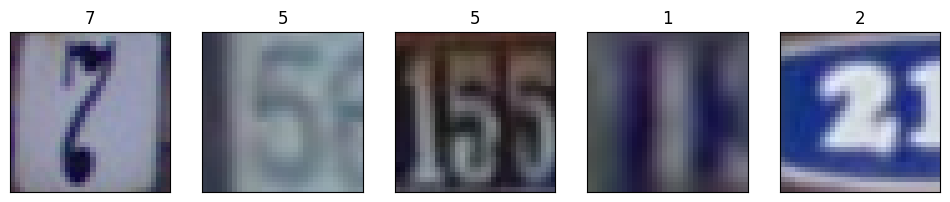

In [ ]:
#Loading dataset
import random
train_set = torchvision.datasets.SVHN(
    root='./datasets', split='train', transform=None,
     target_transform=None, download=True)

fig, axes = plt.subplots(1, 5, figsize=(12, 2.5))
indices = random.sample(range(len(train_set)), 5)
for i, idx in enumerate(indices):
    image, label = train_set[idx]
    axes[i].imshow(image)
    axes[i].set_title(label)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.show()

In [ ]:
class CNNImagenetteV(nn.Module):
    def __init__(self, dropout=0.5):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.GroupNorm(8, 64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.GroupNorm(8, 128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.GroupNorm(8, 256),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.GroupNorm(8, 512),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(dropout),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [ ]:
model = CNNImagenetteV()
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")
print(f"Model size: {total_params * 4 / (1024**2):.2f} MB")  # assuming float32


Total parameters: 1,558,026
Model size: 5.94 MB


We used 4 convolutional layers and 1 FC layer, in some of the layers we added
DropOut in order to avoid overfitting
We used RelU as an activation function
and maxpool and glocbalavgpool on last layer
Kernel was defined as 3x3

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import Imagenette
import itertools
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# No augmentations for validation and test
eval_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
full_train_set = Imagenette(root='./datasets', split='train',
                            download=True, transform=train_transform)
val_size = int(0.2 * len(full_train_set))
train_size = len(full_train_set) - val_size
train_set, val_set = random_split(full_train_set, [train_size, val_size])

# Load test set
test_set = Imagenette(root='./datasets', split='val',
                      download=True, transform=eval_transform)
# Loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False, num_workers=2)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

100%|██████████| 1.56G/1.56G [00:30<00:00, 50.3MB/s]


In [ ]:
def train_and_evaluate(lr, weight_decay, dropout, patience):
    model = CNNImagenetteV(dropout).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=patience, factor=0.5)

    best_acc = 0.0
    for epoch in range(5):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            loss = criterion(model(images), labels)
            loss.backward()
            optimizer.step()

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        acc = correct / total
        best_acc = max(best_acc, acc)
        scheduler.step(acc)

    return best_acc


lr_range = (3e-4, 8e-4)
wd_range = (1e-6, 1e-3)
dropout_range = (0.1, 0.6)
patience_range = (2, 4)

num_trials = 10

best_score = 0
best_params = None

for i in range(num_trials):
    params = {
        'lr': 10**np.random.uniform(np.log10(lr_range[0]), np.log10(lr_range[1])),
        'weight_decay': 10**np.random.uniform(np.log10(wd_range[0]), np.log10(wd_range[1])),
        'dropout': np.random.uniform(dropout_range[0], dropout_range[1]),
        'patience': np.random.randint(patience_range[0], patience_range[1] + 1)
    }

    acc = train_and_evaluate(**params)
    print(f"[{i+1}/{num_trials}] lr={params['lr']:.6f}, wd={params['weight_decay']:.6f}, dr={params['dropout']:.4f}, pt={params['patience']} → val acc={acc:.4f}")
    if acc > best_score:
        best_score = acc
        best_params = params

print(f"\n✅ Best config: lr={best_params['lr']:.6f}, wd={best_params['weight_decay']:.6f}, dr={best_params['dropout']:.4f}, pt={best_params['patience']} → val acc={best_score:.4f}")

[1/10] lr=0.000646, wd=0.000120, dr=0.5848, pt=4 → val acc=0.5737
[2/10] lr=0.000738, wd=0.000049, dr=0.5773, pt=3 → val acc=0.5425
[3/10] lr=0.000608, wd=0.000029, dr=0.5166, pt=4 → val acc=0.5732
[4/10] lr=0.000680, wd=0.000001, dr=0.2716, pt=4 → val acc=0.6223
[5/10] lr=0.000549, wd=0.000007, dr=0.5799, pt=2 → val acc=0.5483
[6/10] lr=0.000426, wd=0.000205, dr=0.2519, pt=4 → val acc=0.5779
[7/10] lr=0.000609, wd=0.000005, dr=0.3397, pt=4 → val acc=0.6207
[8/10] lr=0.000421, wd=0.000058, dr=0.2429, pt=3 → val acc=0.6086
[9/10] lr=0.000706, wd=0.000003, dr=0.1797, pt=3 → val acc=0.6239
[10/10] lr=0.000396, wd=0.000129, dr=0.2270, pt=4 → val acc=0.5858

✅ Best config: lr=0.000706, wd=0.000003, dr=0.1797, pt=3 → val acc=0.6239


We used random search to test hyperparameters on the validation set. Some of the results were alike so we tried different combinations in the training.|The hyperamaeters we chose are: lr,wd,dropout and patience all of them were checked in different combinations. There can be more hyperparameters but we didnt want to make the model over-complicated.
note that we ran this a couple of times and it was very resource counsuming so we used results that were slighlty better from a previous run in next line.


Epoch 1/40 | Train Loss: 2.1958 | Validation Accuracy: 32.01%
Epoch 2/40 | Train Loss: 1.8670 | Validation Accuracy: 48.12%
Epoch 3/40 | Train Loss: 1.6707 | Validation Accuracy: 52.93%
Epoch 4/40 | Train Loss: 1.5537 | Validation Accuracy: 57.37%
Epoch 5/40 | Train Loss: 1.4686 | Validation Accuracy: 63.97%
Epoch 6/40 | Train Loss: 1.3878 | Validation Accuracy: 65.50%
Epoch 7/40 | Train Loss: 1.3408 | Validation Accuracy: 65.93%
Epoch 8/40 | Train Loss: 1.2827 | Validation Accuracy: 68.25%
Epoch 9/40 | Train Loss: 1.2572 | Validation Accuracy: 69.47%
Epoch 10/40 | Train Loss: 1.2312 | Validation Accuracy: 70.84%
Epoch 11/40 | Train Loss: 1.2030 | Validation Accuracy: 73.16%
Epoch 12/40 | Train Loss: 1.1852 | Validation Accuracy: 71.53%
Epoch 13/40 | Train Loss: 1.1765 | Validation Accuracy: 71.21%
Epoch 14/40 | Train Loss: 1.1386 | Validation Accuracy: 74.54%
Epoch 15/40 | Train Loss: 1.1202 | Validation Accuracy: 73.32%
Epoch 16/40 | Train Loss: 1.1163 | Validation Accuracy: 72.48%
E

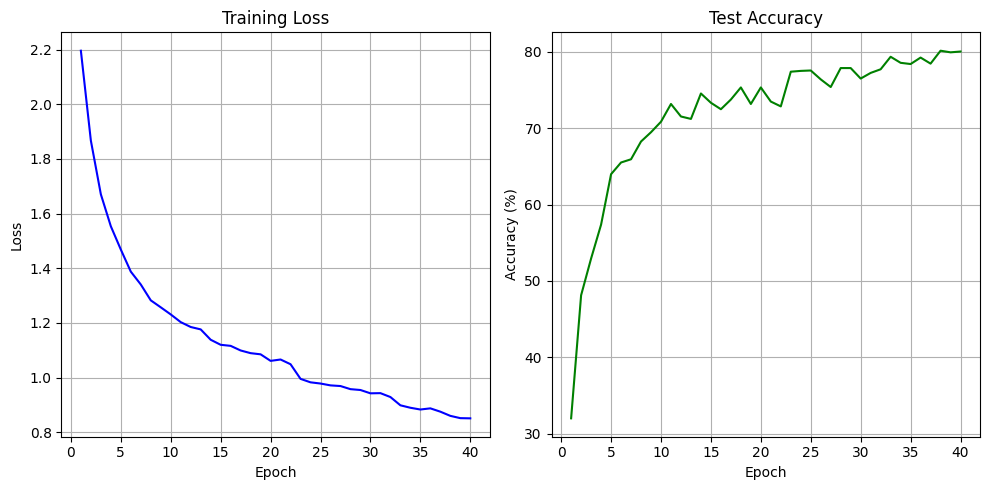

In [ ]:
best_lr, best_wd, best_dropout, best_patience = 0.0006, 0.00001, 0.1908, 3 #From earlier because we dont want to run the validaion cell a lot of time
model = CNNImagenetteV(dropout=best_dropout).to(device)

# === Define optimizer, loss, scheduler ===
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.Adam(model.parameters(), lr=best_lr, weight_decay=best_wd)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=best_patience, factor=0.5)

# === Train final model ===
final_epochs = 40
train_losses = []
test_accuracies = []

# === Best model tracking ===
best_acc = 0.0
best_model_state = None
best_epoch = -1

for epoch in range(final_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # === Evaluate on test set ===
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    test_accuracies.append(acc)

    scheduler.step(acc)

    # === Check if best ===
    if acc > best_acc:
        best_acc = acc
        best_model_state = model.state_dict()
        best_epoch = epoch + 1

    print(f"Epoch {epoch+1}/{final_epochs} | Train Loss: {train_loss:.4f} | Validation Accuracy: {acc*100:.2f}%")

# === Evaluate final model on the true test set ===
model.load_state_dict(best_model_state)  # Load best checkpoint
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total
print(f"\n📊 Final Test Accuracy: {test_acc*100:.2f}%")

import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 5))

# Plot train loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, [acc * 100 for acc in test_accuracies], label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


The best test accuracy we achieved in this part was 79.11%.
using 40 epochs. The training and test curves look healthy, and while we see them start to platau near the end of training, we didn’t observe signs of clear overfitting or underfitting.

To help the model generalize better and avoid becoming too confident, we used label smoothing with ε = 0.1. This "slows down" the learning process slightly, encouraging the model to make softer predictions instead of hard one-hot decisions. It might slightly lower peak accuracy, but it often results in a more robust model overall.

In [ ]:
def calculate_accuracy(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100.0 * correct / total
    return accuracy
alphas = [0.05, 0.01, 0.005]

for alpha in alphas:
    noisy_test_set = []

    for i in range(len(test_set)):
        image, label = test_set[i]

        # Add Gaussian noise scaled by alpha
        noisy_image = image + alpha * torch.randn_like(image)

        # Clamp to valid range [0, 1]
        noisy_image = torch.clamp(noisy_image, 0, 1)

        noisy_test_set.append((noisy_image, label))

    # Create a DataLoader for the noisy test set
    noisy_loader = torch.utils.data.DataLoader(noisy_test_set, batch_size=64, shuffle=False)

    # Evaluate accuracy using your model
    accuracy = calculate_accuracy(model, noisy_loader, device)
    print(f"Test Accuracy with noise α={alpha:.3f}: {accuracy:.2f}%")

Test Accuracy with noise α=0.050: 37.58%
Test Accuracy with noise α=0.010: 38.14%
Test Accuracy with noise α=0.005: 38.22%


We can see that the model fails when it encounters nosiy inputs - preproccesing the dataset and adding noise to it might make the model more robust and able to handle noise


In [ ]:
train_transform = transforms.Compose([
    transforms.Resize((72, 72)),                # Slight upscale
    transforms.RandomCrop((64, 64)),            # Random crop back to 64
    transforms.RandomHorizontalFlip(p=0.5),     # Mirror images
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], # Optional normalization
                         [0.229, 0.224, 0.225])
])

full_train_set = Imagenette(root='./datasets', split='train', size='160px',
                            download=True, transform=train_transform)
val_size = int(0.2 * len(full_train_set))
train_size = len(full_train_set) - val_size
train_set, val_set = random_split(full_train_set, [train_size, val_size])

# Load test set
test_set = Imagenette(root='./datasets', split='val', size='160px',
                      download=True, transform=eval_transform)
# Loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False, num_workers=2)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=2)

Epoch 1/40 | Train Loss: 2.1536 | Val Accuracy: 30.11%
Epoch 2/40 | Train Loss: 1.8371 | Val Accuracy: 45.96%
Epoch 3/40 | Train Loss: 1.6274 | Val Accuracy: 54.83%
Epoch 4/40 | Train Loss: 1.5045 | Val Accuracy: 58.64%
Epoch 5/40 | Train Loss: 1.4114 | Val Accuracy: 62.60%
Epoch 6/40 | Train Loss: 1.3508 | Val Accuracy: 65.93%
Epoch 7/40 | Train Loss: 1.3122 | Val Accuracy: 68.46%
Epoch 8/40 | Train Loss: 1.2623 | Val Accuracy: 68.15%
Epoch 9/40 | Train Loss: 1.2451 | Val Accuracy: 69.57%
Epoch 10/40 | Train Loss: 1.2124 | Val Accuracy: 71.16%
Epoch 11/40 | Train Loss: 1.1854 | Val Accuracy: 72.37%
Epoch 12/40 | Train Loss: 1.1853 | Val Accuracy: 72.42%
Epoch 13/40 | Train Loss: 1.1520 | Val Accuracy: 72.48%
Epoch 14/40 | Train Loss: 1.1279 | Val Accuracy: 71.16%
Epoch 15/40 | Train Loss: 1.1379 | Val Accuracy: 73.06%
Epoch 16/40 | Train Loss: 1.1294 | Val Accuracy: 71.95%
Epoch 17/40 | Train Loss: 1.0993 | Val Accuracy: 73.01%
Epoch 18/40 | Train Loss: 1.0813 | Val Accuracy: 72.79%
E

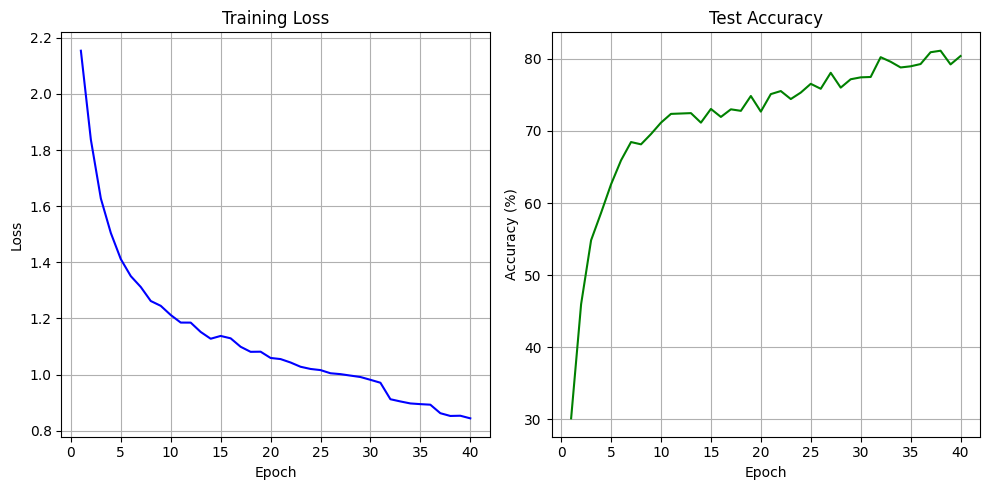

In [59]:
best_lr, best_wd, best_dropout, best_patience = 0.0006, 0.00001, 0.1908, 3 #From earlier because we dont want to run the validaion cell a lot of time
model = CNNImagenetteV(dropout=best_dropout).to(device)

# === Define optimizer, loss, scheduler ===
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.Adam(model.parameters(), lr=best_lr, weight_decay=best_wd)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=best_patience, factor=0.5)

# === Train final model ===
final_epochs = 40
train_losses = []
test_accuracies = []

# === Best model tracking ===
best_acc = 0.0
best_model_state = None
best_epoch = -1

for epoch in range(final_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # === Evaluate on test set ===
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    test_accuracies.append(acc)

    scheduler.step(acc)

    # === Check if best ===
    if acc > best_acc:
        best_acc = acc
        best_model_state = model.state_dict()
        best_epoch = epoch + 1

    print(f"Epoch {epoch+1}/{final_epochs} | Train Loss: {train_loss:.4f} | Val Accuracy: {acc*100:.2f}%")

model.load_state_dict(best_model_state)  # Load best checkpoint
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total
print(f"\n📊 Final Test Accuracy: {test_acc*100:.2f}%")

import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 5))

# Plot train loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, [acc * 100 for acc in test_accuracies], label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


To improve generalization,We retrained the classifier using data augmentations from torchvision.transforms. The augmentations we used were:

Resize to 72×72 — upscales images slightly to simulate zoom

Random crop to 64×64 — introduces translation and variation in framing

Random horizontal flip (p=0.5) — mirrors objects to prevent orientation bias

Normalization to standard ImageNet mean and std

These augmentations encourage the model to be more robust to spatial variation, making it rely on meaningful features rather than exact pixel positions.

We also used size='160px' when loading the Imagenette dataset. While the final training resolution was still 64×64, starting from higher-resolution source images led to cleaner downscaling and likely preserved more visual detail, which improved performance.


✅ Result
With these changes, the test accuracy improved from ~78-79% (baseline without augmentation) to ~79-80% at epoch 40.

This shows that even simple augmentations and a better starting resolution can provide a boost in test performance.

In [ ]:
pip install kornia


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


Epoch 1/40 | Train Loss: 2.1917 | Val Accuracy: 34.02%
Epoch 2/40 | Train Loss: 1.9197 | Val Accuracy: 41.10%
Epoch 3/40 | Train Loss: 1.7060 | Val Accuracy: 47.75%
Epoch 4/40 | Train Loss: 1.5493 | Val Accuracy: 54.73%
Epoch 5/40 | Train Loss: 1.4844 | Val Accuracy: 63.39%
Epoch 6/40 | Train Loss: 1.4317 | Val Accuracy: 57.63%
Epoch 7/40 | Train Loss: 1.3841 | Val Accuracy: 62.55%
Epoch 8/40 | Train Loss: 1.3549 | Val Accuracy: 65.93%
Epoch 9/40 | Train Loss: 1.2923 | Val Accuracy: 63.76%
Epoch 10/40 | Train Loss: 1.2748 | Val Accuracy: 58.16%
Epoch 11/40 | Train Loss: 1.2498 | Val Accuracy: 63.13%
Epoch 12/40 | Train Loss: 1.2386 | Val Accuracy: 68.99%
Epoch 13/40 | Train Loss: 1.2200 | Val Accuracy: 65.50%
Epoch 14/40 | Train Loss: 1.2067 | Val Accuracy: 63.76%
Epoch 15/40 | Train Loss: 1.1822 | Val Accuracy: 69.47%
Epoch 16/40 | Train Loss: 1.1817 | Val Accuracy: 62.18%
Epoch 17/40 | Train Loss: 1.1774 | Val Accuracy: 66.98%
Epoch 18/40 | Train Loss: 1.1355 | Val Accuracy: 69.26%
E

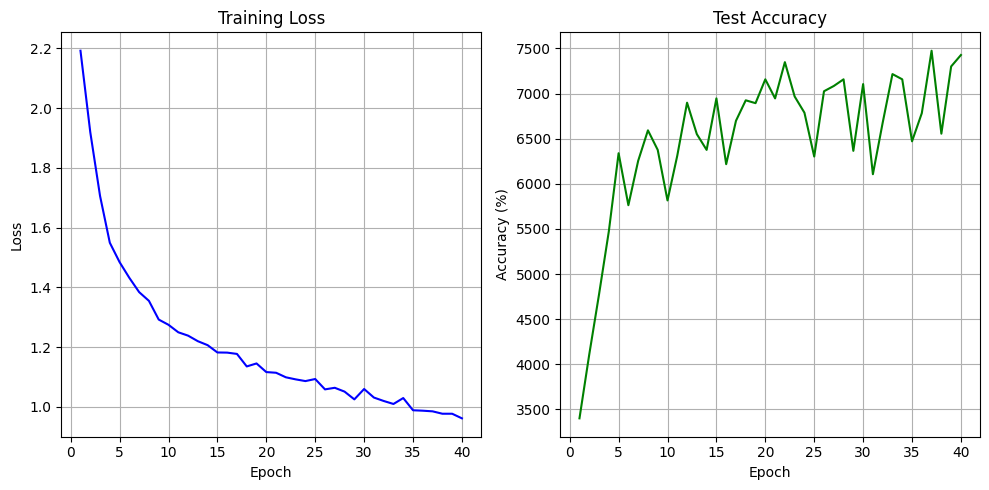

In [60]:
import kornia.augmentation as K
import kornia.enhance as KE
import torch.nn as nn
import torch

# === Kornia normalization (enhance.Normalize)
kornia_pipeline = nn.Sequential(
    K.Resize((72, 72), p=1.0),
    K.RandomCrop((64, 64), p=1.0),
    K.RandomHorizontalFlip(p=0.5),
    KE.Normalize(
        mean=torch.tensor([0.485, 0.456, 0.406], device=device),
        std=torch.tensor([0.229, 0.224, 0.225], device=device)
    )
).to(device)

# === Training loop
train_losses = []
test_accuracies = []
best_acc = 0
best_model_state = None


best_lr, best_wd, best_dropout, best_patience = 0.0006, 0.00001, 0.1908, 3 #From earlier because we dont want to run the validaion cell a lot of time
model = CNNImagenetteV(dropout=best_dropout).to(device)

# === Define optimizer, loss, scheduler ===
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.Adam(model.parameters(), lr=best_lr, weight_decay=best_wd)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=best_patience, factor=0.5)


for epoch in range(40):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Apply Kornia augmentations + normalization
        images = kornia_pipeline(images)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # === Evaluation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            # Only normalize for test set (no augmentations)
            images = KE.Normalize(
                mean=torch.tensor([0.485, 0.456, 0.406], device=device),
                std=torch.tensor([0.229, 0.224, 0.225], device=device)
            )(images)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = 100.0 * correct / total
    test_accuracies.append(acc)

    if acc > best_acc:
        best_acc = acc
        best_model_state = model.state_dict()

    print(f"Epoch {epoch+1}/{40} | Train Loss: {train_loss:.4f} | Val Accuracy: {acc:.2f}%")

model.load_state_dict(best_model_state)  # Load best checkpoint
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total
print(f"\n📊 Final Test Accuracy: {test_acc*100:.2f}%")

import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 5))

# Plot train loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, [acc * 100 for acc in test_accuracies], label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


Although the Val accuracy fluctuates, it often reaches around 68–72%.:
This "jitter" is expected with Kornia, since each batch is augmented differently — it makes the training less stable, but encourages better generalization.

val accuracy stayed high for many epochs, but did not steadily improve like in the baseline. and the final test accuracy was quite bad. This shows Kornia helps robustness, but may need more epochs or learning rate tuning to fully benefit.